In [1]:
from IPython.display import Image, Markdown, display, HTML
import pandas as pd
import os, sys
path_to_import = "../src/models/DMCAR"
if path_to_import not in sys.path:
    sys.path.append(path_to_import)
import marshaller
import tographviz

In [2]:
model_df = pd.read_excel("Payments Conceptual Model (DMCAR) v0.2003.xlsx")
popo = marshaller.popo_from_pandas(model_df)

In [3]:
g = tographviz.popo_to_nx(popo)
domain_hierarchy_g=tographviz.nx_domain_hierarchy_from_dmcar_popo(popo)


In [4]:
c = tographviz.recursive_domain_walk_to_graphviz(popo, domain_hierarchy_g, g, 'Domain(RootDomain)', content=None)

Accounts hasHolder
Accounts hostsMandate
Accounts hostsSO
Accounts isServicedBy
Accounts appliedTo
Interface IsSubClassOf(7)
Interface usesMedia
Interface IsSubClassOf(7)
Interface usesMedia
Messaging Function
Messaging hasType
Party IsSubClassOf(6)
Party IsSubClassOf(3)
Party IsSubClassOf(2)
Party IsSubClassOf(1)
Party IsSubClassOf(6)
Party IsSubClassOf(3)
Party IsSubClassOf(2)
Party IsSubClassOf(1)
Payment PartOfGroup
Payment applied
Payment appliedFX
Payment associatedObligation
Payment hasPartyRole
Payment references
Payment parentBlock
Payment PartOfGroup
Payment applied
Payment appliedFX
Payment associatedObligation
Payment hasPartyRole
Payment references
Payment parentBlock
Payments IsSubClassOf(4)
Payments IsSubClassOf(5)
Payments authorisedParty
Payments memberOfMedia
Payments InstructedIn
Payments ReferencedIn
Payments bookedEntries
Payments inboundInterface
Payments initiatingInterface
Payments outboundInterface
Payments referencesMandate
Payments referencesSO
Payments Instr

In [5]:
c.graph_attr['beautify']="false"
c.graph_attr['compound']="true"
print(c.source)

graph Root {
	graph [beautify=false compound=true]
	subgraph cluster_Payments {
		subgraph cluster_Accounts {
			Account
			AccountHolder
			AccountServicer
			CashEntry
			DirectDebitMandate
			StandingOrder
			subgraph cluster_Account {
			}
			subgraph cluster_AccountHolder {
			}
			subgraph cluster_AccountServicer {
			}
			subgraph cluster_CashEntry {
			}
			subgraph cluster_DirectDebitMandate {
			}
			subgraph cluster_StandingOrder {
			}
			Account -- AccountHolder [label=hasHolder]
			Account -- DirectDebitMandate [label=hostsMandate]
			Account -- StandingOrder [label=hostsSO]
			Account -- AccountServicer [label=isServicedBy]
			CashEntry -- Account [label=appliedTo]
		}
		subgraph cluster_Interface {
			Channel
			Interface
			InterfaceMedia
			subgraph cluster_Channel {
			}
			subgraph cluster_Interface {
				Channel
				Interface
				InterfaceMedia
				Channel -- Interface [label="IsSubClassOf(7)"]
				Interface -- InterfaceMedia [label=usesMedia]
			}
			subgraph clus

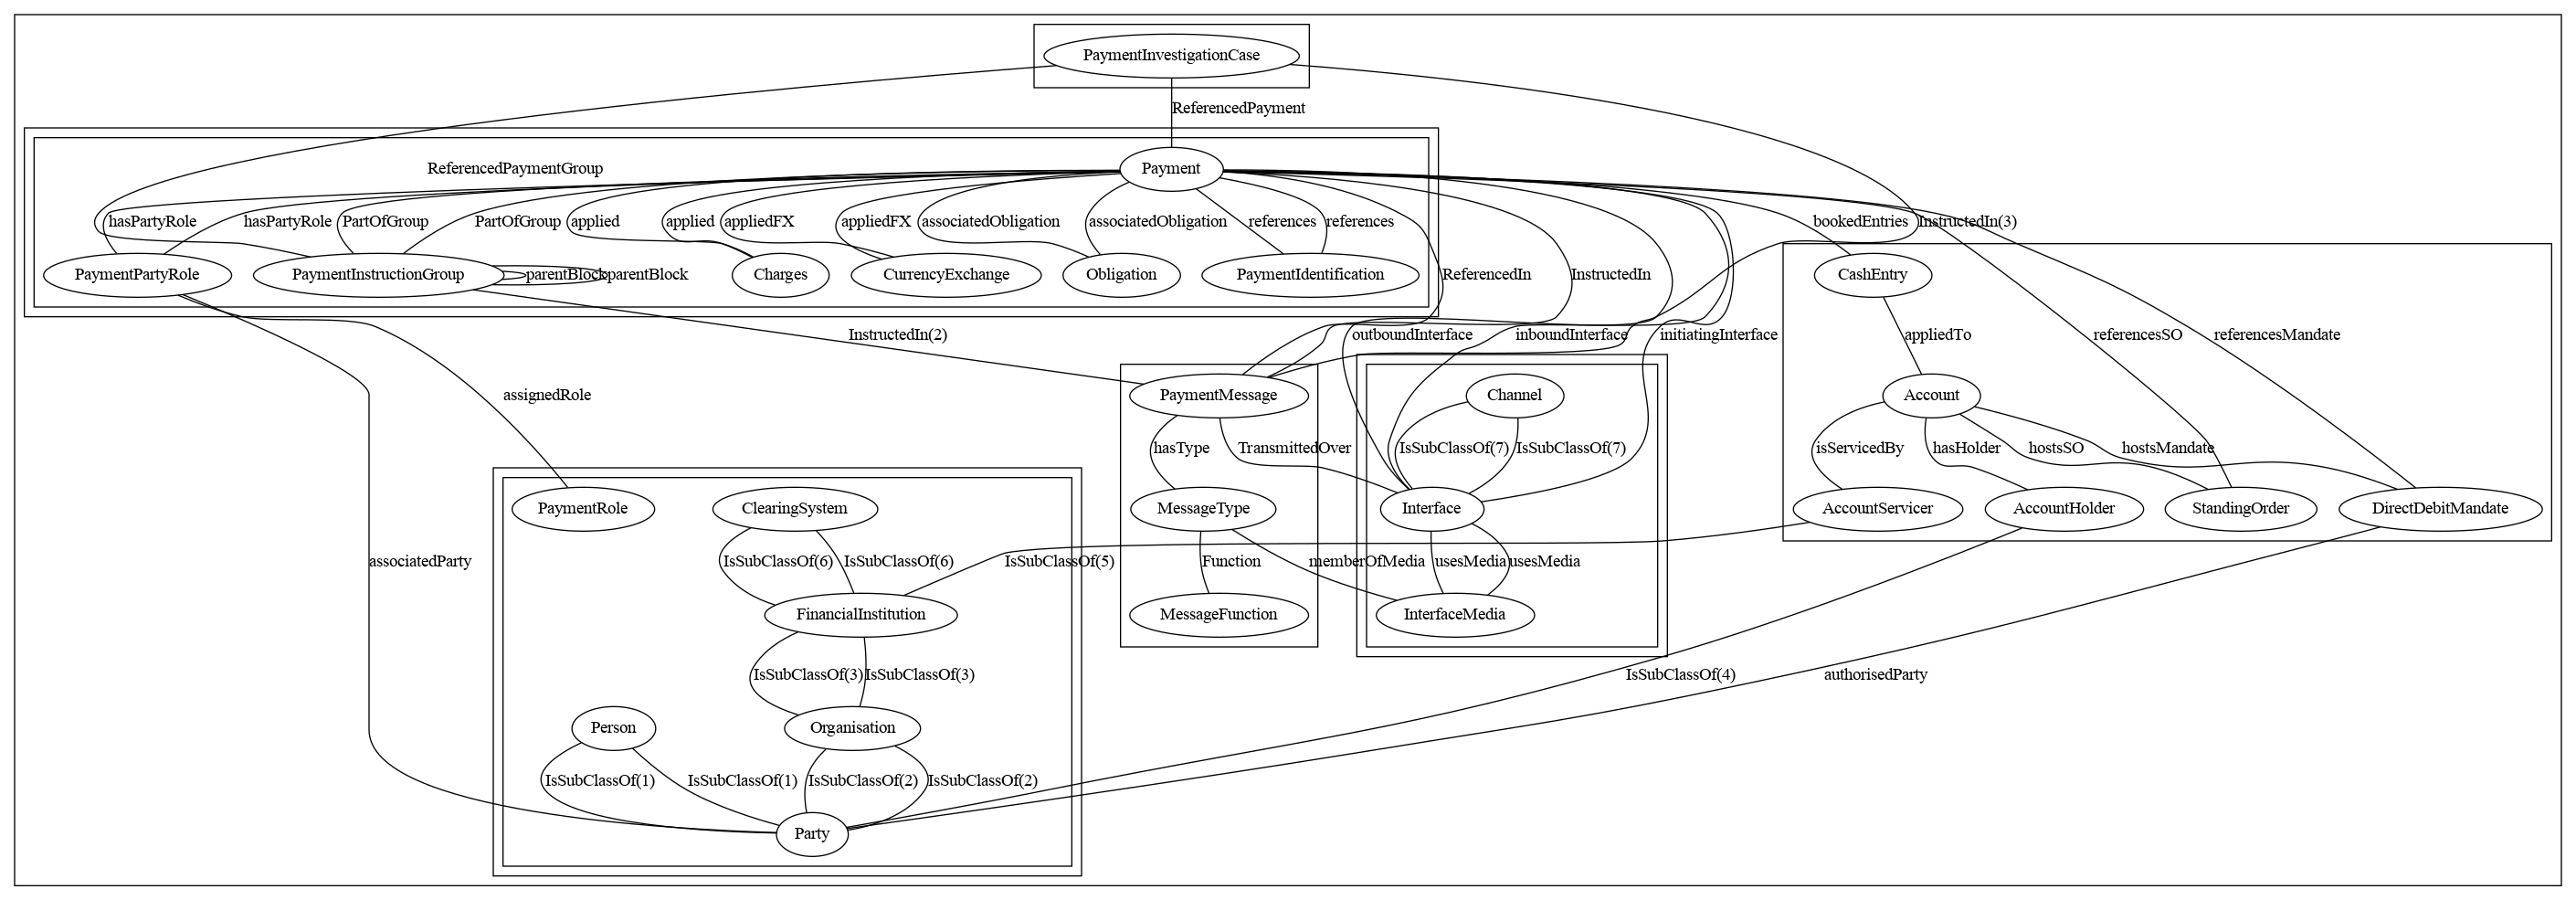

In [6]:
display(Image(c.pipe(engine="dot", format="png")))

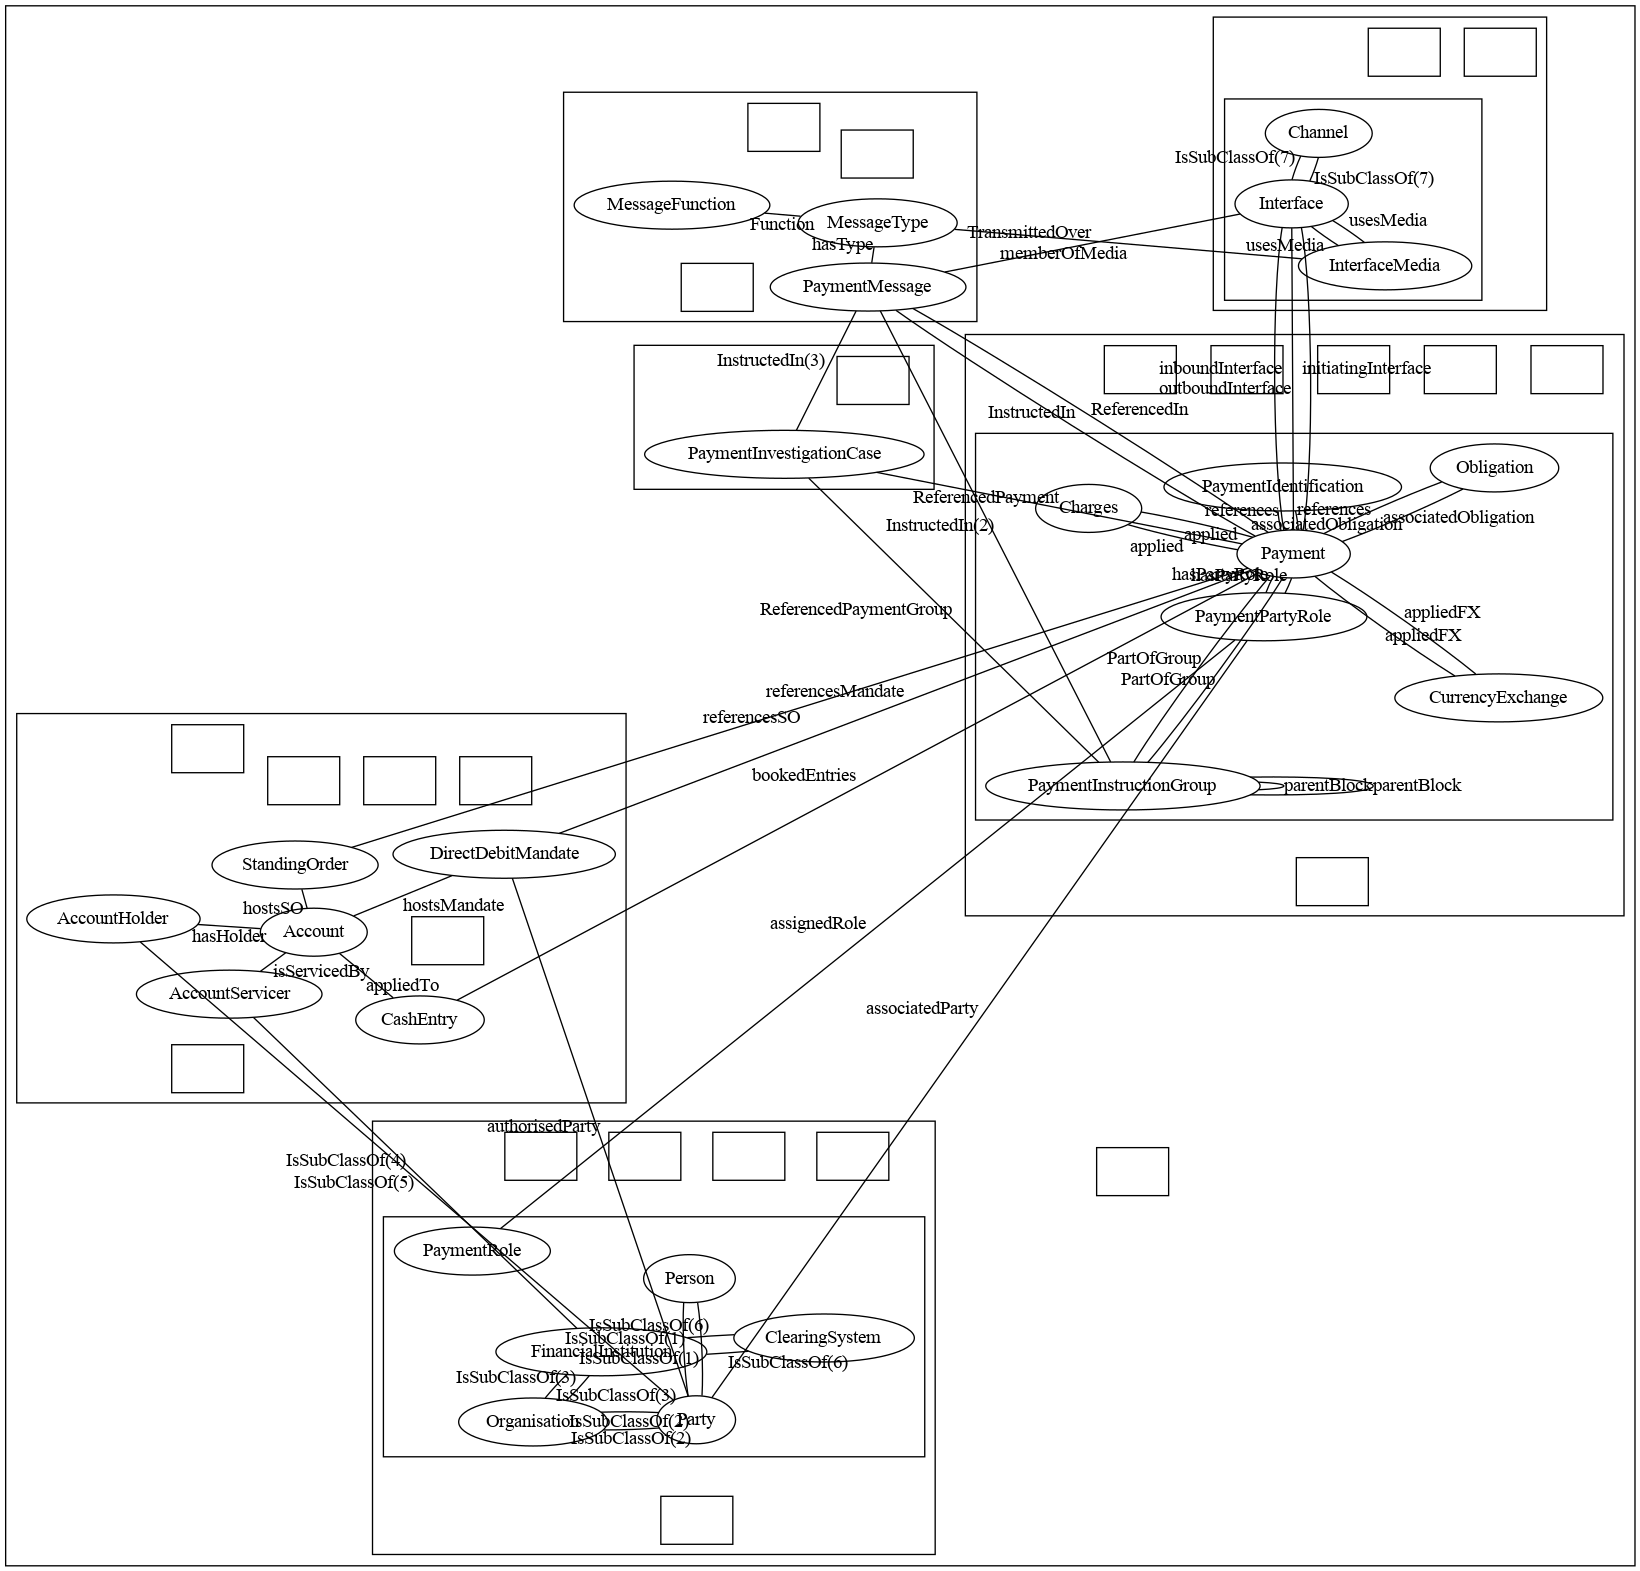

In [7]:
display(Image(c.pipe(engine="fdp", format="png")))

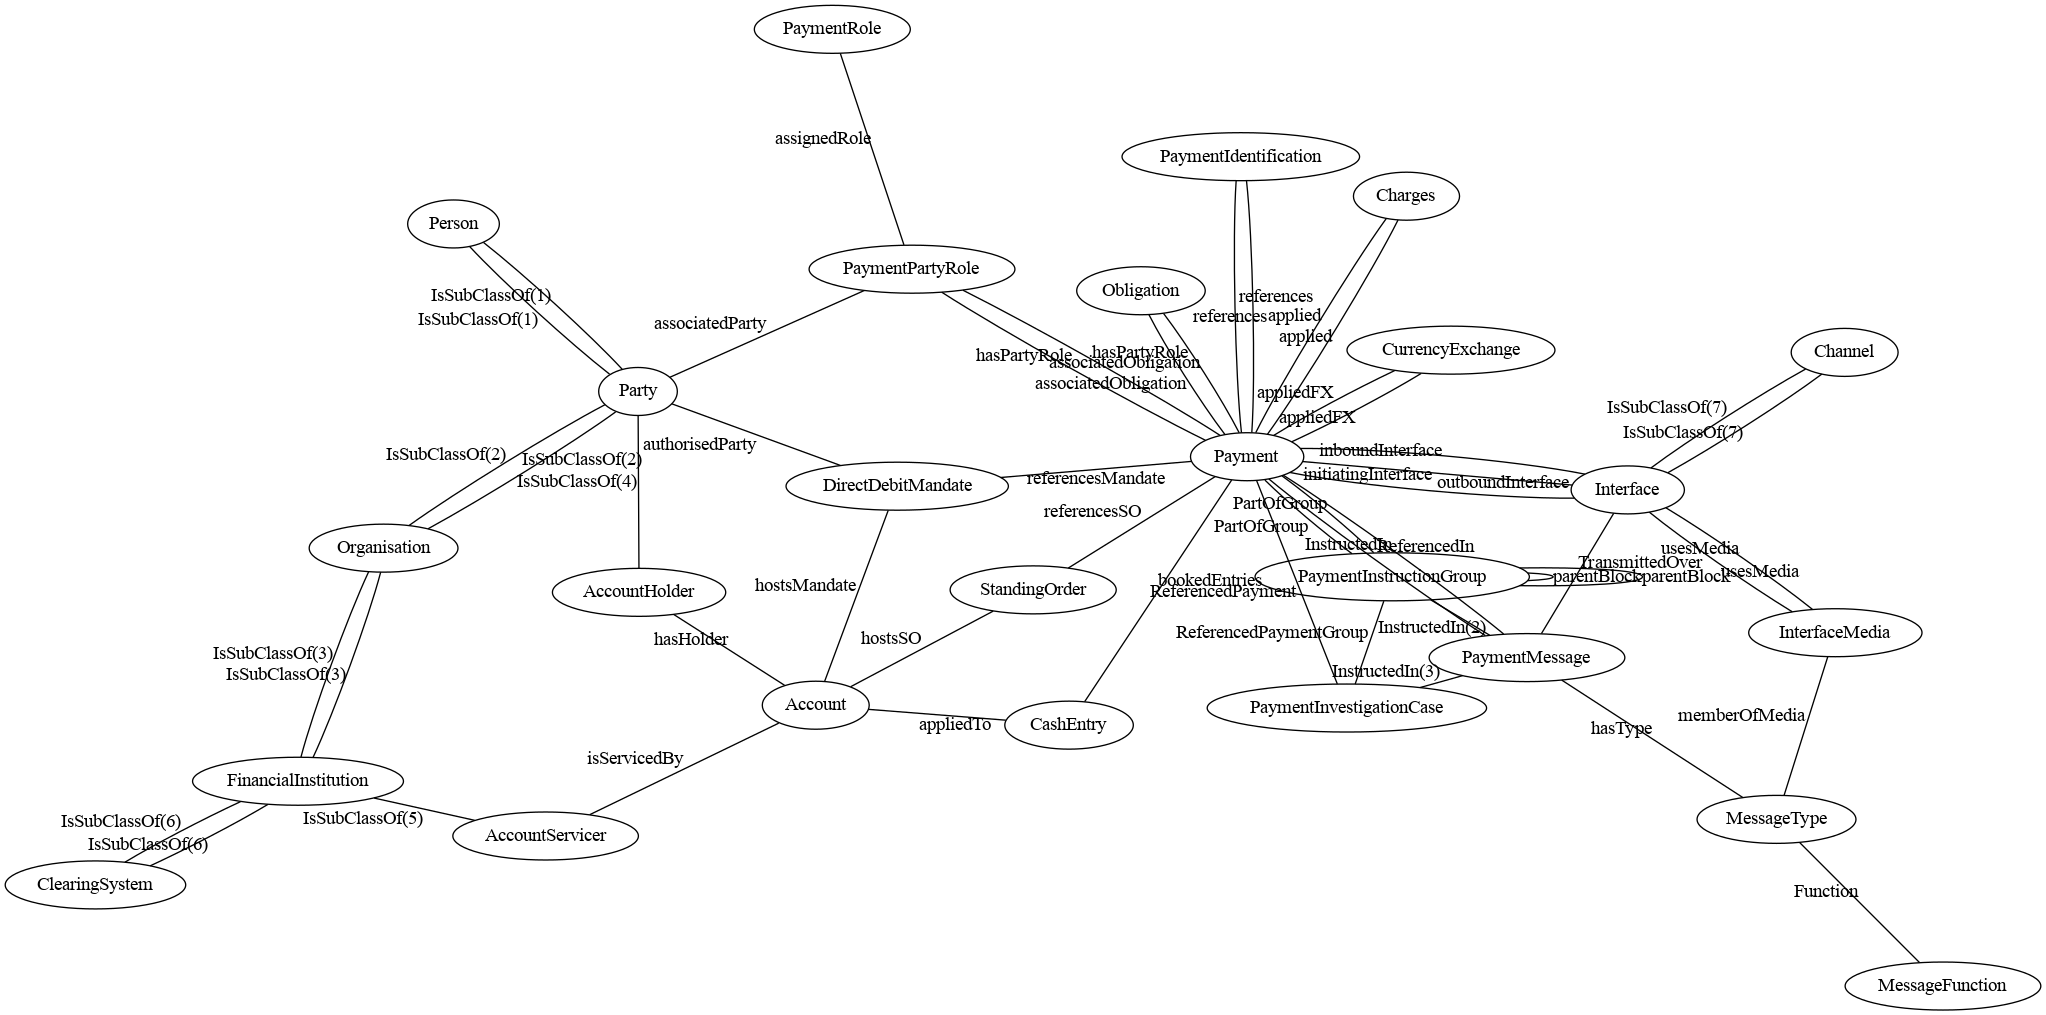

In [8]:
display(Image(c.pipe(engine="sfdp", format="png")))

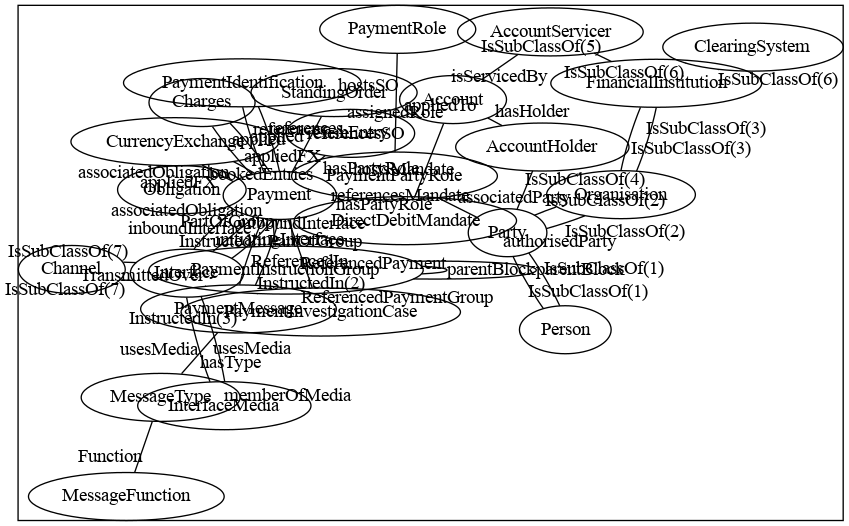

In [9]:
display(Image(c.pipe(engine="neato", format="png")))

In [10]:
c.render(engine="sfdp", format="svg")

'Root.gv.svg'

In [11]:
print(c.source)

graph Root {
	graph [beautify=false compound=true]
	subgraph cluster_Payments {
		subgraph cluster_Accounts {
			Account
			AccountHolder
			AccountServicer
			CashEntry
			DirectDebitMandate
			StandingOrder
			subgraph cluster_Account {
			}
			subgraph cluster_AccountHolder {
			}
			subgraph cluster_AccountServicer {
			}
			subgraph cluster_CashEntry {
			}
			subgraph cluster_DirectDebitMandate {
			}
			subgraph cluster_StandingOrder {
			}
			Account -- AccountHolder [label=hasHolder]
			Account -- DirectDebitMandate [label=hostsMandate]
			Account -- StandingOrder [label=hostsSO]
			Account -- AccountServicer [label=isServicedBy]
			CashEntry -- Account [label=appliedTo]
		}
		subgraph cluster_Interface {
			Channel
			Interface
			InterfaceMedia
			subgraph cluster_Channel {
			}
			subgraph cluster_Interface {
				Channel
				Interface
				InterfaceMedia
				Channel -- Interface [label="IsSubClassOf(7)"]
				Interface -- InterfaceMedia [label=usesMedia]
			}
			subgraph clus

In [12]:
import gravis

In [13]:
from pyvis.network import Network

g=tographviz.popo_to_nx(popo, easy=True)
nv = Network(height="900px", width="900px", bgcolor="#222222", font_color="white", notebook=True)
nv.from_nx(g)
nv.show("nx_vis.html")


nx_vis.html
